In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('d:/First_AI/data/csv/basketball_stat.csv')

In [3]:
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [4]:
df.Pos.value_counts()

C     50
SG    50
Name: Pos, dtype: int64

In [5]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

In [7]:
%matplotlib inline

Text(0.5, 1.0, 'AST and 2P in 3d plane')

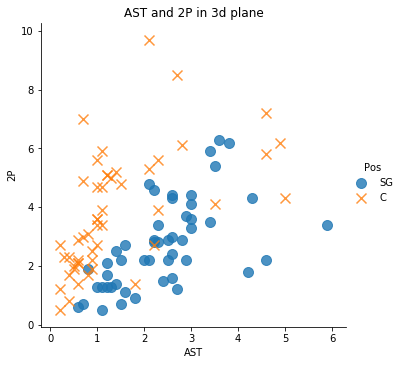

In [8]:
sns.lmplot('AST', '2P', data= df, fit_reg= False,
          scatter_kws={'s': 100},
          markers= ['o', 'x'],
          hue= "Pos")
plt.title('AST and 2P in 3d plane')

Text(0.5, 1.0, 'STL and 2P in 2d plane')

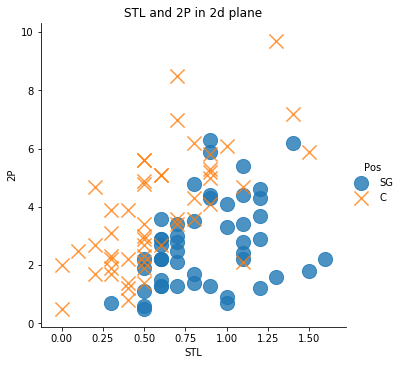

In [9]:
sns.lmplot('STL', '2P', data= df, fit_reg= False,
          scatter_kws={'s': 200},
          markers= ['o', 'x'],
          hue= "Pos")
plt.title('STL and 2P in 2d plane')

Text(0.5, 1.0, 'BLK and 3P in 2d plane')

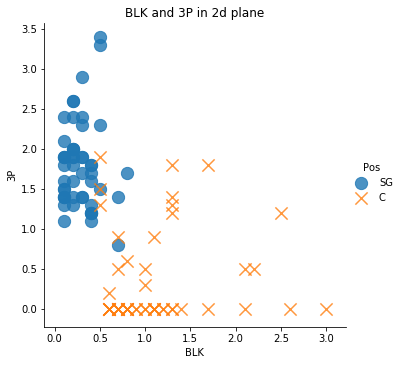

In [10]:
sns.lmplot('BLK', '3P', data= df, fit_reg= False,
          scatter_kws={'s': 150},
          markers= ['o', 'x'],
          hue= "Pos")
plt.title('BLK and 3P in 2d plane')

Text(0.5, 1.0, 'BLK and 3P in 2d plane')

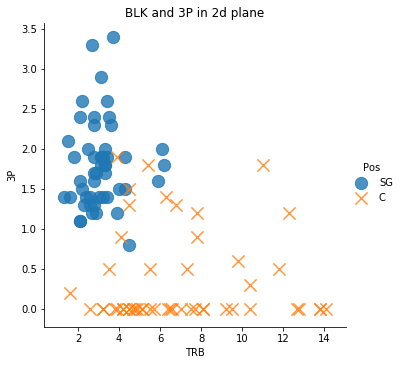

In [11]:
sns.lmplot('TRB', '3P', data= df, fit_reg= False,
          scatter_kws={'s': 150},
          markers= ['o', 'x'],
          hue= "Pos")
plt.title('BLK and 3P in 2d plane')

In [12]:
df.drop(['2P', 'AST', 'STL'], axis= 1, inplace= True)

In [13]:
df.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
train, test= train_test_split(df, test_size= 0.2)

In [16]:
train.shape[0]

80

In [17]:
test.shape[0]

20

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [19]:
# 학습데이터를 절반까지 지정
max_k_range= train.shape[0] // 2
k_list= []
for i in range(3, max_k_range, 2):
    k_list.append(i)
    
cross_validation_scores= []
x_train = train[['3P', 'BLK', 'TRB']]
y_train = train[['Pos']]

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors= k)
    scores = cross_val_score(knn, x_train, y_train.values.ravel(), cv= 10, scoring= 'accuracy')
    cross_validation_scores.append(scores.mean())
    
cross_validation_scores

[0.925,
 0.925,
 0.925,
 0.925,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.8625,
 0.85,
 0.85,
 0.85,
 0.85,
 0.85,
 0.85,
 0.8375]

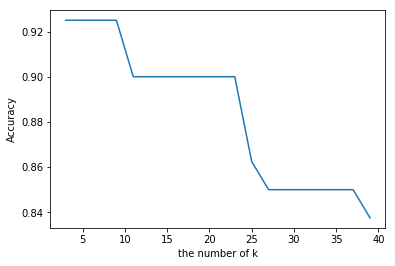

In [20]:
plt.plot(k_list, cross_validation_scores)
plt.xlabel('the number of k')
plt.ylabel('Accuracy')
plt.show()

In [21]:
k = k_list[cross_validation_scores.index(max(cross_validation_scores))]
print('The best number of k : ' + str(k))

The best number of k : 3


In [22]:
knn = KNeighborsClassifier(n_neighbors= k)

In [23]:
x_train = train[['3P', 'BLK', 'TRB']]
y_train = train[['Pos']]

knn.fit(x_train, y_train.values.ravel())

x_test = test[['3P', 'BLK', 'TRB']]
y_test = test[['Pos']]

pred = knn.predict(x_test)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [25]:
print('accuracy : ' + str(accuracy_score(y_test.values.ravel(), pred)))

accuracy : 0.9


In [26]:
comparison = pd.DataFrame({'prediction': pred, 'ground_truth': y_test.values.ravel()})
comparison

,prediction,ground_truth
0,SG,SG
1,C,C
2,C,SG
3,C,C
4,C,C
5,C,C
6,SG,SG
7,C,C
8,C,C
9,C,C
